<h1><b>Carbon Footprint Engine - Integration of GHG emitting events</b></h1>
<h1><b>Scope 1 & Scope 2</b></h1>

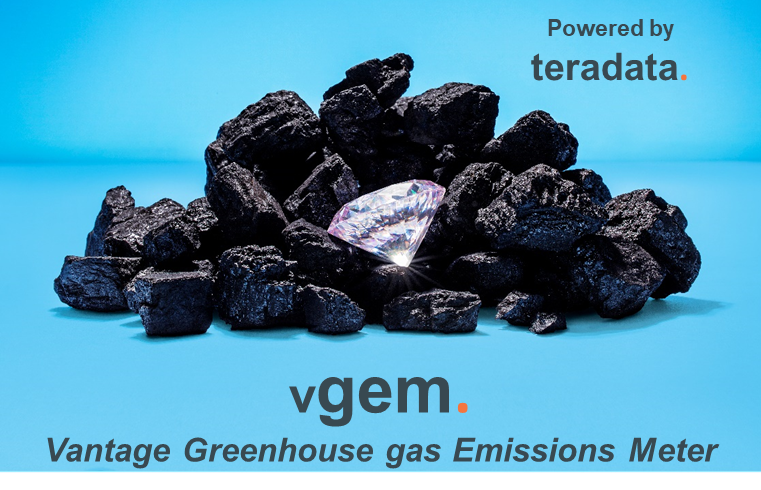

<p><b>This script integrates Scope 1 & Scope 2 data to the carbon footprint engine</b></p>

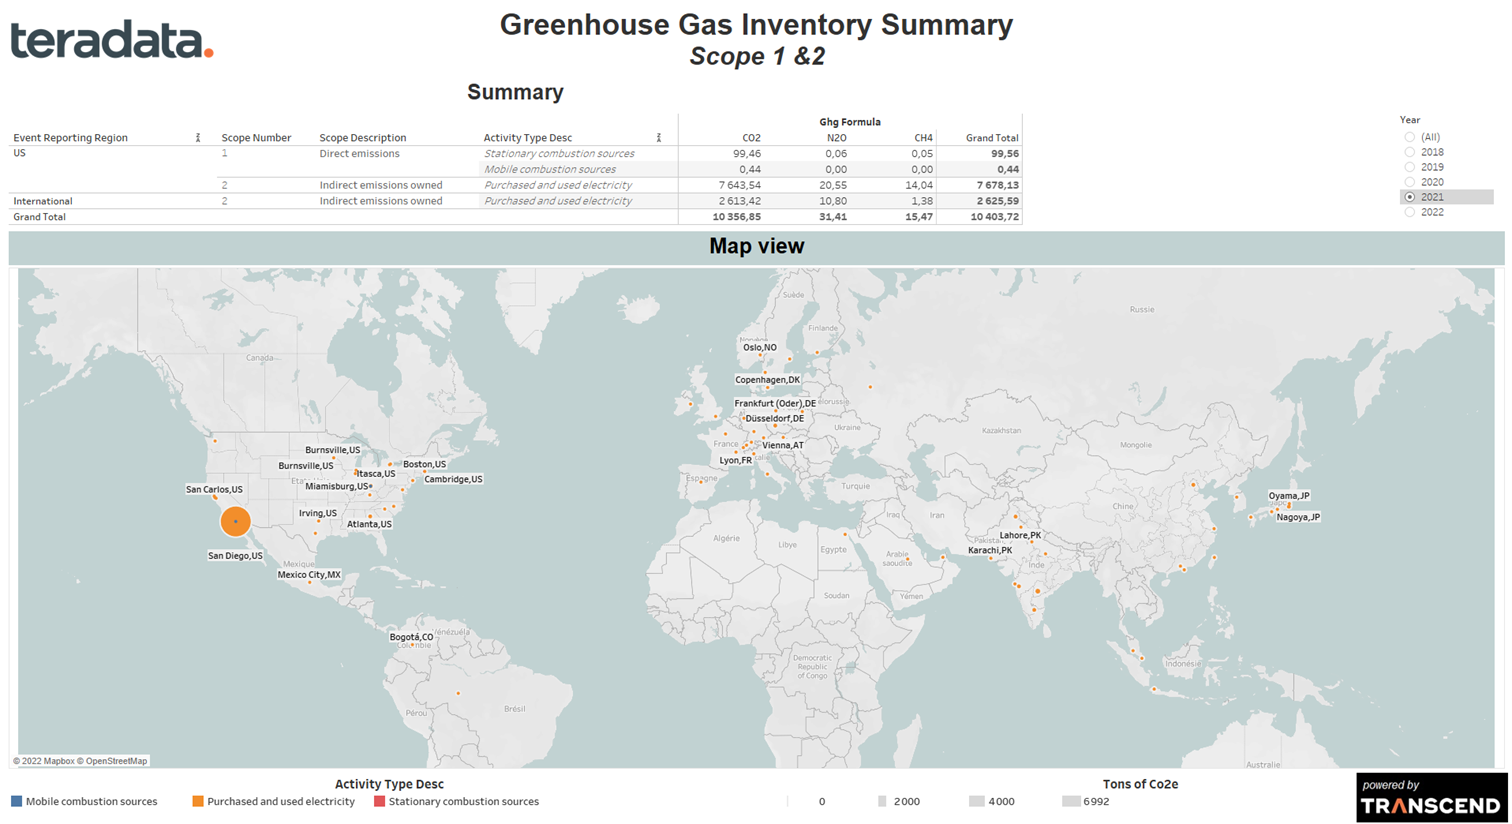

<h1>Settings</h1>

<h2>Database settings</h2>

In [1]:
%var vantageInstance               = "Transcend-Production-AWS"
    ,workingDatabase               = "ADLSLSEMEA_Scope3"
    ,georefPrefixe                 = "GEO_"
    ,greenAgendaPrefixe            = "GA2_"
    ,foreignTablePrefixe           = "FT_"
    ,stagingTablePrefixe           = "STG_"
    ,coreTablePrefixe              = "CORE_"
    ,authReadNOS                   = "GA_auth_read_nos"
    ,objectStoreInputDataBucketURL = "/gs/storage.googleapis.com/green-agenda/"

<h2>Entities (tables)</h2>

In [2]:
%var tbTeradataSites  = "Teradata_sites"
    ,tbStatCombustSrc = "Stationary_combustion_sources"
    ,tbMobCombustSrc  = "Mobile_combustion_sources"
    ,tbPurchElectric  = "Purchased_electricity"
    ,tbGhgEmissEvt    = "GHG_emission_event"
    ,tbGhgEmissEvtGp  = "GHG_emission_event_group"
    ,tbEntityRef      = "Entity_ref"
    ,tbActRef         = "Activity_ref"

<h1>Connection to Vantage</h1>

In [3]:
%connect ${vantageInstance}

Success: 'Transcend-Production-AWS' connection established and activated for user 'gl186002'


<h1>Mapping of Teradata Sites with geo_ids</h1>

In [4]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbTeradataSites};

Success: 33 rows affected

In [5]:
CREATE MULTISET FOREIGN TABLE ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbTeradataSites} ,FALLBACK ,
     EXTERNAL SECURITY INVOKER TRUSTED ${authReadNOS} ,
     MAP = TD_MAP1
     (
      Location VARCHAR(2048) CHARACTER SET UNICODE CASESPECIFIC,
      site_name VARCHAR(103) CHARACTER SET LATIN NOT CASESPECIFIC,
      country VARCHAR(26) CHARACTER SET LATIN NOT CASESPECIFIC,
      country_geo_id INTEGER,
      City VARCHAR(30) CHARACTER SET UNICODE NOT CASESPECIFIC)
USING
(
      location  ('${objectStoreInputDataBucketURL}GHGEmissionEvents/${tbTeradataSites}/')
      MANIFEST  ('FALSE')
      PATHPATTERN  ('$var1/$var2/$var3')
      ROWFORMAT  ('{"field_delimiter":"\t","record_delimiter":"\r\n","character_set":"UTF8"}')
      STOREDAS  ('TEXTFILE')
      HEADER  ('TRUE')
      STRIP_EXTERIOR_SPACES  ('FALSE')
      STRIP_ENCLOSING_CHAR  ('NONE')
)
NO PRIMARY INDEX ;

Success: 0 rows affected

In [6]:
select * from ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbTeradataSites}

,Location,site_name,country,country_geo_id,City
1,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,"Buenos Aires, Argentina",Argentina,3865483,Buenos Aires
2,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,Canberra Australia-new 2013,Australia,2077456,Canberra
3,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,Melbourne - Australia,Australia,2077456,Melbourne
4,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,Sydney-new 2013,Australia,2077456,Sydney
5,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,Vienna Austria- new 2013,Austria,2782113,Vienna
6,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,"Sao Paulo, Brazil",Brazil,3469034,Sao Paulo
7,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,Mississauga,Canada,6251999,Mississauga
8,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,"Mississauga, CA",Canada,6251999,Mississauga
9,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,"Toronto, CA-new 2013",Canada,6251999,Toronto
10,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Teradata_sites/Teradata_sites.csv,"Santiago, Chile-new 2013",Chile,3895114,Santiago


In [7]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${stagingTablePrefixe}${tbTeradataSites};

Success: 23 rows affected

In [8]:
create table ${workingDatabase}.${greenAgendaPrefixe}${stagingTablePrefixe}${tbTeradataSites} as
(select site_name
       ,site_country
       ,site_city
       ,geo_id
from   (select  tdsites.site_name               as site_name
               ,tdsites.country                 as site_country
               ,tdsites.city                    as site_city
               ,tdsites.country_geo_id          as country_geo_id
               ,georef.geo_id                   as geo_id
               ,case georef.geo_feature_code_id
                  when 'PPLC'  then 1
                  when 'PPLA'  then 2
                  when 'PPLA2' then 3
                  when 'PPLA3' then 4
                  when 'PPLA4' then 5
                  when 'PPLA6' then 6
                  when 'PPL'   then 7
                  when 'ADM2'  then 8
                  when 'N_ND'  then 9
                end                             as rank_no
        from    ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbTeradataSites} tdsites
        inner join
                ${workingDatabase}.${georefPrefixe}${coreTablePrefixe}${tbEntityRef} georef
        on      tdsites.country_geo_id      =   georef.country_geo_id
        and     tdsites.city                =   georef.geo_name
        and     georef.geo_feature_code_id in ('PPL','PPLC','PPLA','PPLA2','PPLA3','ADM2','N_ND')
        qualify row_number() over(partition by tdsites.site_name
                                  order by georef.population         desc
                                          ,rank_no
                                 )                                        = 1
       ) geo_sites
)
with data
unique primary index(site_name)
;

Success: 0 rows affected

WARNING: [Teradata Database] [Warning 4375] Files/records in foreign table(s) were skipped.

In [9]:
select  *
from    ${workingDatabase}.${greenAgendaPrefixe}${stagingTablePrefixe}${tbTeradataSites}
order by site_country,site_city;

,site_name,site_country,site_city,geo_id
1,"Buenos Aires, Argentina",Argentina,Buenos Aires,3435910
2,Canberra Australia-new 2013,Australia,Canberra,2172517
3,Melbourne - Australia,Australia,Melbourne,2158177
4,Sydney-new 2013,Australia,Sydney,2147714
5,Vienna Austria- new 2013,Austria,Vienna,2761369
6,"Sao Paulo, Brazil",Brazil,Sao Paulo,3665091
7,"Mississauga, CA",Canada,Mississauga,6075357
8,Mississauga,Canada,Mississauga,6075357
9,"Toronto, CA-new 2013",Canada,Toronto,6167865
10,"Santiago, Chile-new 2013",Chile,Santiago,3871336


<h1>Integration of Scope 1 - Stationary combustion emission sources</h1>

In [10]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbStatCombustSrc};

Success: 37 rows affected

In [11]:
create foreign table ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbStatCombustSrc}
 ,external security invoker trusted ${authReadNOS}
  using(location('${objectStoreInputDataBucketURL}GHGEmissionEvents/Scope1/Company_facilities/${tbStatCombustSrc}/'))
;

Success: 0 rows affected

WARNING: [Teradata Database] [Warning 4968] Unsupported record_delimiter:'
'. Table Created: with record_delimiter value:'\n'.Use READ_NOS RAW mode to determine the delimiters.

In [12]:
select * from ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbStatCombustSrc}

WARNING: [Teradata Database] [Warning 4375] Files/records in foreign table(s) were skipped.

,Location,year,facility,energy_type,energy_use,unit_metric,data_source
1,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2019.csv,2019,San Diego,Stationary Natural Gas,1153.4,MMBTU,purchase records
2,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2018.csv,2018,San Diego,Stationary Natural Gas,905.7,MMBTU,purchase records
3,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2020.csv,2020,San Diego,Stationary Natural Gas,562.9,MMBTU,purchase records
4,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2021.csv,2021,San Diego,Stationary Natural Gas,452.1,MMBTU,purchase records
5,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2019.csv,2019,San Diego,"Stationary Distillate Fuel Oil (#1, 2, &4)",0,MMBTU,purchase records
6,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2018.csv,2018,San Diego,"Stationary Distillate Fuel Oil (#1, 2, &4)",0,MMBTU,purchase records
7,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2020.csv,2020,San Diego,"Stationary Distillate Fuel Oil (#1, 2, &4)",21.3,MMBTU,purchase records
8,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2021.csv,2021,San Diego,"Stationary Distillate Fuel Oil (#1, 2, &4)",3.8,MMBTU,purchase records
9,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2019.csv,2019,Lexington,Stationary Natural Gas,50.1,MMBTU,purchase records
10,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_facilities/Stationary_combustion_sources/scope1_stationary_combustion_sources_2018.csv,2018,Lexington,Stationary Natural Gas,41.2,MMBTU,purchase records


<h2>Insertion of stationary combustion sources into the core GHG Emission Events table</h2>

In [13]:
delete from ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
where  activity_id like '1RCFSCS%'
and    extract(year from event_start_date) in (select "year"
                                               from   ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbStatCombustSrc}
                                              )
;

Success: 40 rows affected

WARNING: [Teradata Database] [Warning 4375] Files/records in foreign table(s) were skipped.

In [14]:
insert into ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
select  1                                               * 10e16 -- scope 1
      + 1                                               * 10e14 -- Company facilities
      + (stat_combust_src."year" * 10000 + 101)         * 10e6  -- event_start_date
      + hashbucket(hashrow(act_ref.activity_id                  -- hash_value
                          ,td_sites.geo_id
                          ,stat_combust_src.unit_metric))                            as event_id
       ,cast(((stat_combust_src."year"-1900) * 10000) + 101 as date)                 as event_start_date -- valid-start date
       ,cast(((stat_combust_src."year"-1899) * 10000) + 101 as date)                 as event_end_date   -- valid-end date
       ,act_ref.activity_id                                                          as activity_id
       ,null                                                                         as event_group_id
       ,td_sites.geo_id                                                              as geo_id
       ,stat_combust_src.unit_metric                                                 as event_unit_metric
       ,stat_combust_src.energy_use                                                  as event_unit_value
       ,current_timestamp(6)                                                                                                              -- system-start date
       ,until_closed                                                                                                                      -- system-end date
from    ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbStatCombustSrc} stat_combust_src
inner join
        ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbActRef} act_ref
on      stat_combust_src.energy_type = act_ref.activity_desc
inner join
        ${workingDatabase}.${greenAgendaPrefixe}${stagingTablePrefixe}${tbTeradataSites} td_sites
on      stat_combust_src.facility = td_sites.site_name
;

Success: 40 rows affected

WARNING: [Teradata Database] [Warning 4375] Value for system-time column is replaced by a system-generated timestamp.

In [15]:
select *
from   ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
where  activity_id like '1RCFSCS%'
;

,event_id,event_start_date,event_end_date,activity_id,event_group_id,geo_id,event_unit_metric,event_unit_value,sys_start,sys_end
1,101202001010456941,2020-01-01,2021-01-01,1RCFSCSSNG,,4297983,MMBTU,56.4,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00
2,101201801010678666,2018-01-01,2019-01-01,1RCFSCSSNG,,5391811,MMBTU,905.7,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00
3,101202101010913161,2021-01-01,2022-01-01,1RCFSCSSNG,,4180439,MMBTU,0,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00
4,101201801010146336,2018-01-01,2019-01-01,1RCFSCSSDF,,5345860,MMBTU,3,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00
5,101202101010456941,2021-01-01,2022-01-01,1RCFSCSSNG,,4297983,MMBTU,66.9,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00
6,101201901010132564,2019-01-01,2020-01-01,1RCFSCSSNG,,4518188,MMBTU,526.7,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00
7,101202101010110075,2021-01-01,2022-01-01,1RCFSCSSNG,,4700168,MMBTU,0,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00
8,101201901010146336,2019-01-01,2020-01-01,1RCFSCSSDF,,5345860,MMBTU,4.2,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00
9,101202001010333332,2020-01-01,2021-01-01,1RCFSCSSNG,,5345860,MMBTU,2022,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00
10,101202001010174434,2020-01-01,2021-01-01,1RCFSCSSNG,,5019767,MMBTU,0,2022-12-30 10:34:23.820000-05:00,9999-12-31 23:59:59.999999+00:00


In [16]:
collect statistics
 index (event_id)
,column partition
,column event_start_date
,column activity_id
,column event_group_id
,column geo_id
,column sys_end
,column(event_id,event_start_date)
,column(activity_id,geo_id)
on ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
;

Success: 10 rows affected

<h1>Integration of Scope 1 - Mobile Combustion emission sources</h1>

In [17]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbMobCombustSrc};

Success: 37 rows affected

In [18]:
create foreign table ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbMobCombustSrc}
 ,external security invoker trusted ${authReadNOS}
  using(location('${objectStoreInputDataBucketURL}GHGEmissionEvents/Scope1/Company_vehicles/${tbMobCombustSrc}/'))
;

Success: 0 rows affected

WARNING: [Teradata Database] [Warning 4968] Unsupported record_delimiter:'
'. Table Created: with record_delimiter value:'\n'.Use READ_NOS RAW mode to determine the delimiters.

In [19]:
select * from ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbMobCombustSrc};

WARNING: [Teradata Database] [Warning 4375] Files/records in foreign table(s) were skipped.

,Location,year,facility,Fuel and Mobile Source,energy_use,unit_metric,data_source
1,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2021.csv,2021,San Diego,Retrofit LPG Light Duty Vehicle,16,gallon,purchase records
2,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2019.csv,2019,San Diego,Retrofit LPG Light Duty Vehicle,8.2,gallon,Estimation
3,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2018.csv,2018,San Diego,Retrofit LPG Light Duty Vehicle,24.4,gallon,Estimation
4,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2020.csv,2020,San Diego,Retrofit LPG Light Duty Vehicle,24,gallon,Estimation
5,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2021.csv,2021,Miamisburg,Jet Fuel Aircraft,0,gallon,purchase records
6,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2019.csv,2019,Miamisburg,Jet Fuel Aircraft,0,gallon,purchase records
7,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2018.csv,2018,Miamisburg,Jet Fuel Aircraft,0,gallon,purchase records
8,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2020.csv,2020,Miamisburg,Jet Fuel Aircraft,0,gallon,purchase records
9,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2021.csv,2021,San Diego,Gasoline Light-Duty Trucks,39.48,gallon,purchase records
10,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope1/Company_vehicles/Mobile_combustion_sources/scope1_mobile_combustion_sources_2019.csv,2019,San Diego,Gasoline Light-Duty Trucks,27.79,gallon,purchase records


<h2>Insertion of mobile combustion sources into the core GHG Emission Events & Event Grouping tables</h2>

In [20]:
delete from ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvtGp}
where  event_group_id in (select event_group_id
                          from   ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
                          where  activity_id like '1RCVMCS%'
                          and    extract(year from event_start_date) in (select "year"
                                                                         from   ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbMobCombustSrc}
                                                                        )
                         )
;

Success: 12 rows affected

WARNING: [Teradata Database] [Warning 4375] Files/records in foreign table(s) were skipped.

In [21]:
delete from ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
where  activity_id like '1RCVMCS%'
and    extract(year from event_start_date) in (select "year"
                                               from   ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbMobCombustSrc}
                                              )
;

Success: 24 rows affected

WARNING: [Teradata Database] [Warning 4375] Files/records in foreign table(s) were skipped.

In [22]:
insert into ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
select  1                                               * 10e16 -- scope 1
      + 2                                               * 10e14 -- Company vehicles
      + (mob_combust_src."year" * 10000 + 101)          * 10e6  -- event_start_date
      + hashbucket(hashrow(act_ref.activity_id                  -- hash_value
                          ,td_sites.geo_id
                          ,mob_combust_src.unit_metric))                            as event_id
       ,cast(((mob_combust_src."year"-1900) * 10000) + 101 as date)                 as event_start_date -- valid-start date
       ,cast(((mob_combust_src."year"-1899) * 10000) + 101 as date)                 as event_end_date   -- valid-end date
       ,act_ref.activity_id                                                         as activity_id
       ,1                                               * 10e16 -- scope 1
      + 2                                               * 10e14 -- Company vehicles
      + ("year" * 10000 + 101)                          * 10e6  -- event_start_date
      + hashbucket(hashrow(mob_combust_src.facility             -- hash_value
                          ,mob_combust_src."Fuel and Mobile Source"))               as event_group_id
       ,td_sites.geo_id                                                             as geo_id
       ,mob_combust_src.unit_metric                                                 as event_unit_metric
       ,mob_combust_src.energy_use                                                  as event_unit_value
       ,current_timestamp(6) -- system-start date
       ,until_closed         -- system-end date
from    ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbMobCombustSrc} mob_combust_src
inner join
        ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbActRef} act_ref
on      mob_combust_src."Fuel and Mobile Source" = act_ref.activity_desc
inner join
        ${workingDatabase}.${greenAgendaPrefixe}${stagingTablePrefixe}${tbTeradataSites} td_sites
on      mob_combust_src.facility = td_sites.site_name
;

Success: 24 rows affected

WARNING: [Teradata Database] [Warning 4375] Value for system-time column is replaced by a system-generated timestamp.

In [23]:
insert into ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvtGp}
select  1                                               * 10e16 -- scope 1
      + 2                                               * 10e14 -- Company vehicles
      + ("year" * 10000 + 101)                          * 10e6  -- event_start_date
      + hashbucket(hashrow(facility                             -- hash_value
                          ,"Fuel and Mobile Source"))                               as event_group_id
       ,'Single event with several values'                                          as event_group_desc
       ,current_timestamp(6) -- system-start date
       ,until_closed         -- system-end date
from    ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbMobCombustSrc}
group by 1
;

Success: 12 rows affected

WARNING: [Teradata Database] [Warning 4375] Value for system-time column is replaced by a system-generated timestamp.

In [24]:
select  *
from    ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
where   activity_id like '1RCVMCS%'
;

,event_id,event_start_date,event_end_date,activity_id,event_group_id,geo_id,event_unit_metric,event_unit_value,sys_start,sys_end
1,102202001010240235,2020-01-01,2021-01-01,1RCVMCSGLT,102202001010475953,5391811,gallon,59,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
2,102201901010636186,2019-01-01,2020-01-01,1RCVMCSJFA,102201901010404893,4518188,gallon,0,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
3,102202001010018537,2020-01-01,2021-01-01,1RCVMCSLDV,102202001011007991,5391811,gallon,24,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
4,102202101010240235,2021-01-01,2022-01-01,1RCVMCSGLT,102202101010475953,5391811,gallon,39.48,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
5,102201901010888691,2019-01-01,2020-01-01,1RCVMCSGLT,102201901010475953,5391811,mile,1653.21,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
6,102201801010240235,2018-01-01,2019-01-01,1RCVMCSGLT,102201801010475953,5391811,gallon,27.79,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
7,102202101010636186,2021-01-01,2022-01-01,1RCVMCSJFA,102202101010404893,4518188,gallon,0,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
8,102202101010888691,2021-01-01,2022-01-01,1RCVMCSGLT,102202101010475953,5391811,mile,513.27,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
9,102201801010661751,2018-01-01,2019-01-01,1RCVMCSLDV,102201801011007991,5391811,mile,6.1,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
10,102202001010636186,2020-01-01,2021-01-01,1RCVMCSJFA,102202001010404893,4518188,gallon,0,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00


In [25]:
select * from ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvtGp};

,event_group_id,event_group_desc,sys_start,sys_end
1,102201801011007991,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00
2,102201801010404893,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00
3,102202101010475953,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00
4,102202001011007991,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00
5,102202001010475953,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00
6,102201801010475953,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00
7,102201901010475953,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00
8,102202101010404893,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00
9,102201901011007991,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00
10,102202101011007991,Single event with several values,2022-12-30 10:34:32.890000-05:00,9999-12-31 23:59:59.999999+00:00


In [26]:
collect statistics
on ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
;

Success: 10 rows affected

In [27]:
collect statistics
 index (event_group_id)
,column partition
,column sys_end
on ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvtGp}
;

Success: 4 rows affected

<h1>Integration of Scope 2 - Purchased and Used Electricity sources</h1>

In [28]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbPurchElectric};

Success: 37 rows affected

In [29]:
create foreign table ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbPurchElectric}
 ,external security invoker trusted ${authReadNOS}
  using(location('${objectStoreInputDataBucketURL}GHGEmissionEvents/Scope2/${tbPurchElectric}/'))
;

Success: 0 rows affected

WARNING: [Teradata Database] [Warning 4968] Unsupported record_delimiter:'
'. Table Created: with record_delimiter value:'\n'.Use READ_NOS RAW mode to determine the delimiters.

In [30]:
select * from ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbPurchElectric};

WARNING: [Teradata Database] [Warning 4375] Files/records in foreign table(s) were skipped.

,Location,year,facility,energy_type,energy_use,unit_metric,data_source
1,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2020_INTL.csv,2020,Cybercity Pune Tower 12- India,Purchased and used electricity,572.04,MWh,purchase records
2,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2021_INTL.csv,2021,Cybercity Pune Tower 12- India,Purchased and used electricity,330.26,MWh,purchase records
3,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2018_INTL.csv,2018,Mumbai Powai another name is Winchester Mumbai - India,Purchased and used electricity,0,MWh,purchase records
4,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2019_INTL.csv,2019,Cybercity Pune Tower 12- India,Purchased and used electricity,1144.35,MWh,purchase records
5,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2021_US.csv,2021,El Segundo,Purchased and used electricity,153.67,MWh,purchase records
6,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2020_US.csv,2020,El Segundo,Purchased and used electricity,1242.93,MWh,purchase records
7,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2019_US.csv,2019,El Segundo,Purchased and used electricity,1939.93,MWh,purchase records
8,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2018_US.csv,2018,El Segundo,Purchased and used electricity,2074.91,MWh,purchase records
9,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2020_INTL.csv,2020,Vipul Plaza Gurgaon - India,Purchased and used electricity,,MWh,purchase records
10,/GS/storage.googleapis.com/green-agenda/GHGEmissionEvents/Scope2/Purchased_electricity/scope2_purchased_and_used_electricity_sources_2021_INTL.csv,2021,Vipul Plaza Gurgaon - India,Purchased and used electricity,0,MWh,purchase records


<h2>Insertion of purchased electricity records into the core GHG Emission Events table</h2>

In [31]:
delete from ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
where  activity_id like '2UPEPUE%'
and    extract(year from event_start_date) in (select "year"
                                               from   ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbPurchElectric}
                                              )
;

Success: 288 rows affected

WARNING: [Teradata Database] [Warning 4375] Files/records in foreign table(s) were skipped.

In [32]:
insert into ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
select  2                                               * 10e16 -- scope 2
      + 1                                               * 10e14 -- Purchased electricity, steam, heating and cooling for own use
      + (purch_electric."year" * 10000 + 101)           * 10e6  -- event_start_date
      + hashbucket(hashrow(act_ref.activity_id                  -- hash_value
                          ,td_sites.geo_id
                          ,purch_electric.unit_metric))
      + row_number() over(partition by purch_electric."year"
                                      ,act_ref.activity_id
                                      ,td_sites.geo_id
                                      ,purch_electric.unit_metric
                            order by   purch_electric.energy_use
                           ) -1                                    as event_id
       ,cast(((purch_electric."year"-1900) * 10000) + 101 as date) as event_start_date  -- valid-start date
       ,cast(((purch_electric."year"-1899) * 10000) + 101 as date) as event_end_date    -- valid-end date
       ,act_ref.activity_id                                        as activity_id
       ,null                                                       as event_group_id
       ,td_sites.geo_id                                            as geo_id
       ,purch_electric.unit_metric                                 as event_unit_metric
       ,coalesce(purch_electric.energy_use,0)                      as event_unit_value
       ,current_timestamp(6)                                                                                                           -- system-start date
       ,until_closed                                                                                                                   -- system-end date
from    ${workingDatabase}.${greenAgendaPrefixe}${foreignTablePrefixe}${tbPurchElectric} purch_electric
inner join
        ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbActRef} act_ref
on      purch_electric."energy_type" = act_ref.activity_desc
inner join
        ${workingDatabase}.${greenAgendaPrefixe}${stagingTablePrefixe}${tbTeradataSites} td_sites
on      purch_electric.facility = td_sites.site_name
;

Success: 288 rows affected

WARNING: [Teradata Database] [Warning 4375] Value for system-time column is replaced by a system-generated timestamp.

In [33]:
select *
from   ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
--where  activity_id like '2UPEPUE%'
;

,event_id,event_start_date,event_end_date,activity_id,event_group_id,geo_id,event_unit_metric,event_unit_value,sys_start,sys_end
1,201202001010750679,2020-01-01,2021-01-01,2UPEPUELEC,,10520736,MWh,0,2022-12-30 10:34:42.290000-05:00,9999-12-31 23:59:59.999999+00:00
2,201201901010555627,2019-01-01,2020-01-01,2UPEPUELEC,,5786882,MWh,10.14,2022-12-30 10:34:42.290000-05:00,9999-12-31 23:59:59.999999+00:00
3,201202101010054231,2021-01-01,2022-01-01,2UPEPUELEC,,3435910,MWh,87.83,2022-12-30 10:34:42.290000-05:00,9999-12-31 23:59:59.999999+00:00
4,201202101010985401,2021-01-01,2022-01-01,2UPEPUELEC,,1853483,MWh,0,2022-12-30 10:34:42.290000-05:00,9999-12-31 23:59:59.999999+00:00
5,201201801010451524,2018-01-01,2019-01-01,2UPEPUELEC,,1275339,MWh,245.5,2022-12-30 10:34:42.290000-05:00,9999-12-31 23:59:59.999999+00:00
6,201202001010195713,2020-01-01,2021-01-01,2UPEPUELEC,,2964574,MWh,19.03,2022-12-30 10:34:42.290000-05:00,9999-12-31 23:59:59.999999+00:00
7,201201901010350846,2019-01-01,2020-01-01,2UPEPUELEC,,1880252,MWh,45.13,2022-12-30 10:34:42.290000-05:00,9999-12-31 23:59:59.999999+00:00
8,201201801010001022,2018-01-01,2019-01-01,2UPEPUELEC,,6690154,MWh,0,2022-12-30 10:34:42.290000-05:00,9999-12-31 23:59:59.999999+00:00
9,102202001010240235,2020-01-01,2021-01-01,1RCVMCSGLT,102202001010475953,5391811,gallon,59,2022-12-30 10:34:31.960000-05:00,9999-12-31 23:59:59.999999+00:00
10,201201801010063677,2018-01-01,2019-01-01,2UPEPUELEC,,4700168,MWh,98.4,2022-12-30 10:34:42.290000-05:00,9999-12-31 23:59:59.999999+00:00


In [34]:
collect statistics
on ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
;

Success: 10 rows affected